# Credit Card Agency Learning

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

<span style="color: red; font-size: 30px">Change **viewPlots** below if you want to run plots!!</span>

In [2]:
viewPlots = True

## Unsupervised Data Observation

### Evaluate the data

In [3]:
cc_general_df = pd.read_csv('CC_GENERAL.csv')
unsupervised_df = cc_general_df.copy(deep=True)
unsupervised_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
unsupervised_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
unsupervised_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
unsupervised_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
unsupervised_df.sample(20)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4117,C14233,8.576818,0.181818,80.00,80.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,7500.0,76.188977,14.667507,0.000000,12
6755,C16943,497.510544,1.000000,569.94,141.40,428.54,1297.077512,0.750000,0.166667,0.583333,0.166667,5,10,2900.0,770.283123,226.730509,0.000000,12
6112,C16283,3506.489102,1.000000,0.00,0.00,0.00,4467.382055,0.000000,0.000000,0.000000,1.000000,11,0,5000.0,286.708354,628.484562,0.000000,6
6318,C16493,4709.860768,1.000000,0.00,0.00,0.00,3832.366931,0.000000,0.000000,0.000000,0.333333,8,0,6000.0,1239.821726,1464.809088,0.000000,12
8828,C19069,765.146736,0.500000,0.00,0.00,0.00,2907.520964,0.000000,0.000000,0.000000,0.375000,13,0,2500.0,1852.897173,514.143157,0.000000,8
5614,C15770,665.786437,1.000000,5634.56,3335.15,2299.41,0.000000,1.000000,1.000000,1.000000,0.000000,0,104,5200.0,5831.664538,202.213224,0.916667,12
5626,C15783,1393.098681,1.000000,353.43,0.00,353.43,1465.018056,0.700000,0.000000,0.600000,0.200000,3,14,1500.0,491.576263,502.718043,0.000000,10
4815,C14949,2363.615492,1.000000,1441.32,374.64,1066.68,0.000000,0.833333,0.083333,0.833333,0.000000,0,11,6000.0,1055.392983,988.408977,0.000000,12
5190,C15335,14.592300,1.000000,200.40,0.00,200.40,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,196.541494,156.086837,0.454545,12
350,C10361,4211.539631,1.000000,0.00,0.00,0.00,455.581546,0.000000,0.000000,0.000000,0.083333,1,0,10500.0,1288.287239,1164.178674,0.000000,12


#### Initial Sample Thoughts
- Describe is showing a lot of max values far from the mean and 75% Quartile hinting at right-skewed data.
- Tenure's mean is close to the max, with a min far from the mean, hinting at left-skewed data.
- Missing some data from minimum_payments and credit_limit -> impute data
- Balance, cash_advance, credit_limit, payments, and minimum payments is either normalized by 10^4 or 10^6 if using whole numbers only but keeping the decimals is most likely. Evaluating the average of credit_limit would far exceed the norm for credit card limits. Maybe we round the 4 trailing decimal places to normalize to 2 decimal places.
- Purchases, oneoff_purchases, installment_purchases, are the number of purchases made in a transaction, this should be an integer. Doing unnormalize by 10^2 would make the purchases to purchasetrx heavily skewed so we should round this as well.
- credit_limit only has a few decimals of unending numbers for users, i.e. index 7385 has 7/9 as a decimal
- Purchases is the sum of oneoff and installments


#### Oddities

In [8]:
unsupervised_df[['BALANCE','CREDIT_LIMIT']].sample(20)

,BALANCE,CREDIT_LIMIT
3045,4373.439331,7000.0
3050,1484.996584,1500.0
1851,6668.440979,16000.0
1587,343.674421,1700.0
2102,41.936627,13000.0
8026,5134.553859,6000.0
4735,101.874313,2500.0
880,1843.308668,2000.0
826,3957.419199,7500.0
2340,6509.334652,12000.0


In [9]:
#the Frequency features seem off so sum them together to see what we produce and why it isn't adding up to 1 across the board
unsupervised_df[['PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY']].sample(20).sum(axis=1)

8470    1.750001
5372    1.000000
253     2.000000
8782    0.100000
5263    1.166666
8131    0.333333
7351    1.875000
7873    2.250001
2502    1.249999
1224    1.625000
1650    2.916667
982     2.250001
3024    2.083333
1088    0.500000
7741    0.416666
6898    0.500001
66      0.125000
8743    0.454545
286     0.083333
5392    1.777778
dtype: float64

In [10]:
#In the sample I saw a balance higher than the credit limit so let's check these values and how many there are
balance_greaterthan_credit_limits = unsupervised_df[unsupervised_df['BALANCE'] > unsupervised_df['CREDIT_LIMIT']]
balance_greaterthan_credit_limits

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5,C10006,1809.828751,1.0,1333.28,0.0,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
10,C10011,1293.124939,1.0,920.12,0.0,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12
20,C10021,2016.684686,1.0,176.68,0.0,176.68,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,2000.0,223.068600,13557.297260,0.000000,12
64,C10067,1923.886805,1.0,1887.64,0.0,1887.64,1605.949371,1.000000,0.000000,1.000000,0.083333,4,61,1850.0,3688.045998,3266.996777,0.083333,12
78,C10082,1205.716678,1.0,0.00,0.0,0.00,38.325801,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,29.278671,8242.687678,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,C18823,1283.337407,1.0,1022.41,171.6,850.81,1158.035224,0.875000,0.125000,0.750000,0.250000,5,16,1200.0,846.998942,1838.410150,0.000000,8
8614,C18848,1182.080141,1.0,266.68,0.0,266.68,848.848179,0.666667,0.000000,0.666667,0.083333,6,8,1000.0,119.861878,8607.234543,0.000000,12
8624,C18858,1012.089680,1.0,312.48,0.0,312.48,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,325.606238,607.957480,0.000000,12
8724,C18961,3002.791004,1.0,2463.00,2463.0,0.00,797.158950,0.166667,0.166667,0.000000,0.166667,3,3,3000.0,431.716492,16638.733850,0.000000,12


Is this allowed? Having a balance greater than the limit doesn't seem to make sense. Would need clipping or correcting once confirmed this is not possible. Could be a possible refund or credit gifted to the user?

In [11]:
#Find the credit limits that are filled with repeating decimals 
repeating_decimal_credit_limits = unsupervised_df[unsupervised_df['CREDIT_LIMIT'] % 1 != 0]
repeating_decimal_credit_limits

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1951,C12014,1764.908055,0.727273,0.00,0.00,0.00,1552.832951,0.000000,0.000000,0.000000,0.250000,6,0,3666.666667,5126.650633,654.751791,0.125,12
2668,C12745,57.257195,0.818182,472.50,472.50,0.00,0.000000,0.750000,0.750000,0.000000,0.000000,0,9,7227.272727,598.240579,174.283792,0.900,12
3018,C13107,597.297664,0.636364,689.67,228.87,460.80,73.693002,0.666667,0.250000,0.666667,0.083333,1,15,3511.111111,2327.014381,246.495299,0.125,12
3138,C13228,56.091512,0.818182,405.00,0.00,405.00,0.000000,0.750000,0.000000,0.750000,0.000000,0,9,6727.272727,553.440125,171.037361,0.600,12
4519,C14644,1311.952719,0.909091,2092.00,1242.00,850.00,0.000000,0.750000,0.333333,0.500000,0.000000,0,15,5181.818182,3476.019003,330.828719,0.000,12
4884,C15019,287.493279,0.222222,1709.00,1709.00,0.00,0.000000,0.111111,0.111111,0.000000,0.000000,0,1,2283.333333,5120.550705,259.561730,0.000,9
5203,C15349,18.400472,0.166667,0.00,0.00,0.00,186.853063,0.000000,0.000000,0.000000,0.166667,1,0,NaN,9.040017,14.418723,0.000,6
6172,C16343,4198.618090,0.727273,17.30,17.30,0.00,2845.868460,0.083333,0.083333,0.000000,0.250000,6,1,8954.545455,10226.601760,1024.126428,0.100,12
7385,C17586,61.653547,0.454545,1194.22,0.00,1194.22,0.000000,0.666667,0.000000,0.666667,0.000000,0,20,3777.777778,1775.371596,101.147508,0.000,12
8485,C18715,31.932178,0.363636,365.36,0.00,365.36,0.000000,0.333333,0.000000,0.333333,0.000000,0,4,1833.333333,822.118125,137.769926,1.000,12


In [12]:
#Noticed where min payments was missing, the payments feature was heavily zeroed
minimmum_payments_missing = unsupervised_df[unsupervised_df['MINIMUM_PAYMENTS'].isnull()]
minimmum_payments_missing.sample(20)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1086,C11121,4184.915498,1.000000,0.00,0.00,0.00,3757.683590,0.000000,0.000000,0.000000,0.500000,13,0,5000.0,0.000000,NaN,0.0,12
2409,C12482,0.000000,0.000000,313.89,0.00,313.89,0.000000,0.916667,0.000000,0.916667,0.000000,0,19,6000.0,0.000000,NaN,0.0,12
4872,C15007,0.000000,0.000000,94.50,0.00,94.50,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,1500.0,0.000000,NaN,0.0,12
8504,C18735,0.021102,0.125000,0.00,0.00,0.00,922.817511,0.000000,0.000000,0.000000,0.125000,1,0,4000.0,36.672617,NaN,0.0,8
215,C10223,2.433254,0.181818,36.00,0.00,36.00,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,7500.0,0.000000,NaN,0.0,12
422,C10437,3737.175713,1.000000,0.00,0.00,0.00,3017.170336,0.000000,0.000000,0.000000,0.166667,4,0,4500.0,0.000000,NaN,0.0,12
3844,C13952,1.025109,0.090909,59.66,0.00,59.66,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,1700.0,0.000000,NaN,0.0,12
6137,C16308,7.331662,0.090909,90.66,0.00,90.66,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,3000.0,0.000000,NaN,0.0,12
8097,C18316,39.930624,0.222222,399.95,290.57,109.38,0.000000,0.222222,0.222222,0.111111,0.000000,0,9,1200.0,0.000000,NaN,0.0,9
2883,C12967,39.642014,1.000000,0.00,0.00,0.00,45.175571,0.000000,0.000000,0.000000,0.083333,1,0,5000.0,0.000000,NaN,0.0,12


### Visualize the data

In [13]:
to_hist_plot = [
    'BALANCE', 
    'PURCHASES', 
    'ONEOFF_PURCHASES', 
    'INSTALLMENTS_PURCHASES', 
    'CASH_ADVANCE', 
    'CREDIT_LIMIT', 
    'PAYMENTS', 
    'MINIMUM_PAYMENTS',
    'CASH_ADVANCE_TRX', 
    'PURCHASES_TRX', 
    'TENURE', 
    'BALANCE_FREQUENCY', 
    'PURCHASES_FREQUENCY', 
    'ONEOFF_PURCHASES_FREQUENCY', 
    'PURCHASES_INSTALLMENTS_FREQUENCY', 
    'CASH_ADVANCE_FREQUENCY'
]

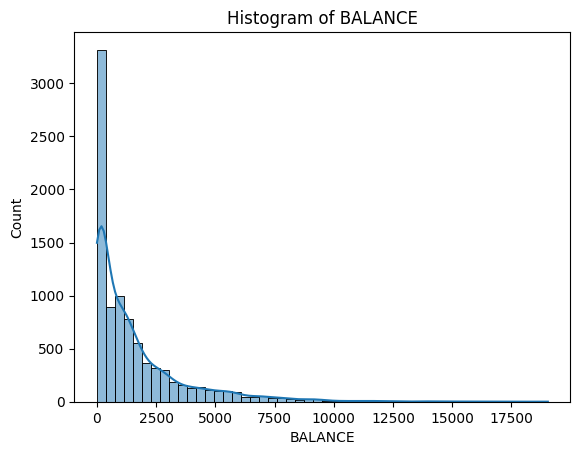

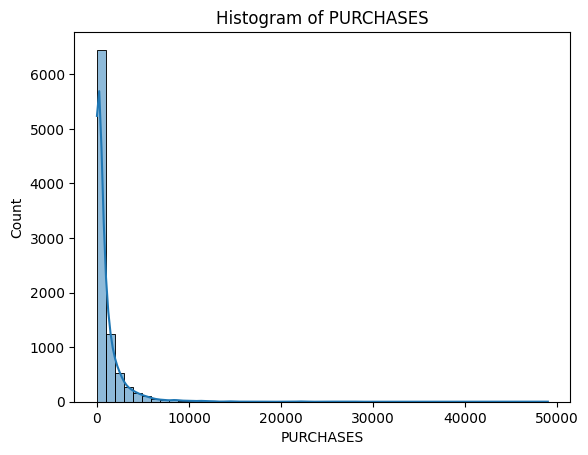

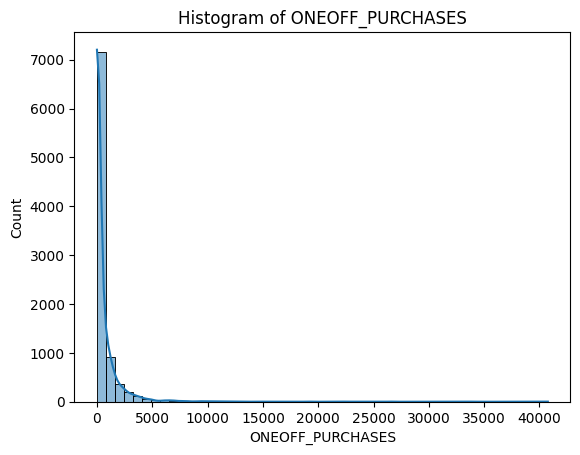

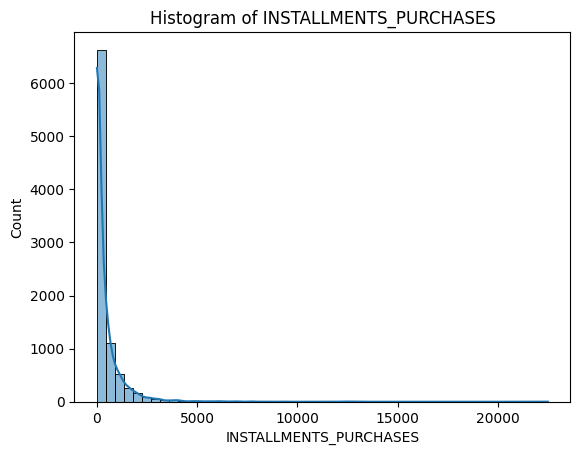

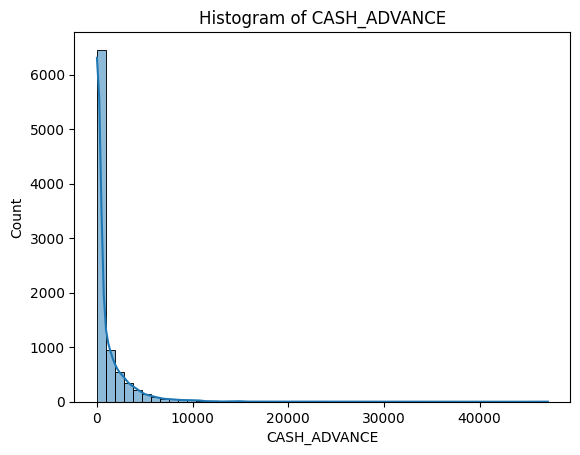

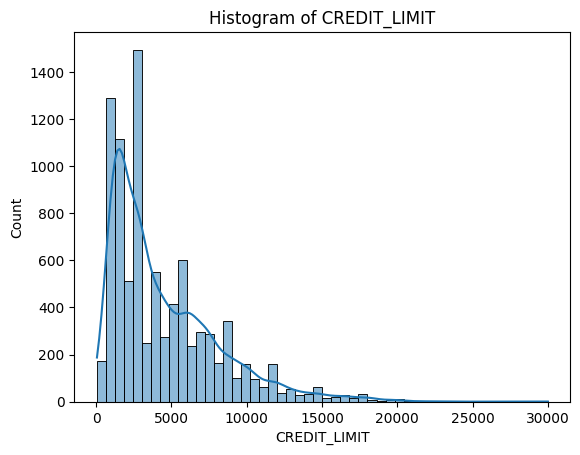

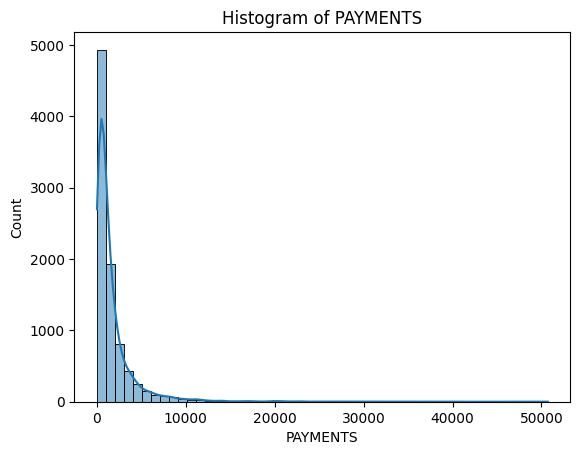

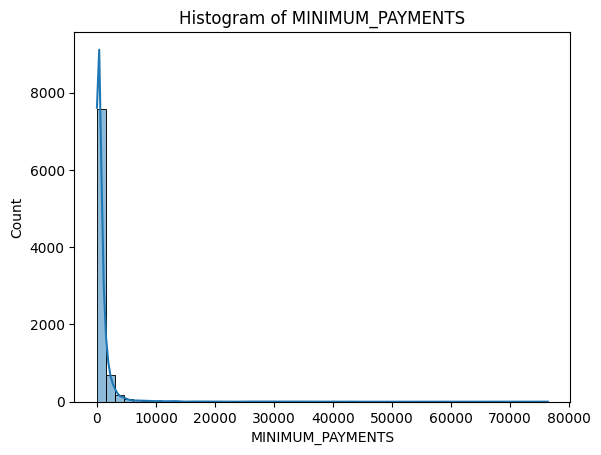

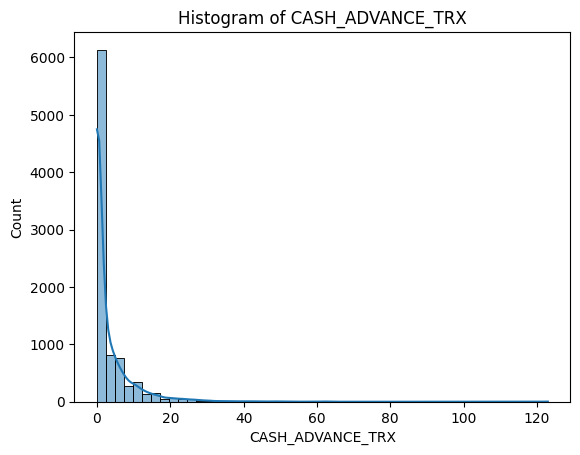

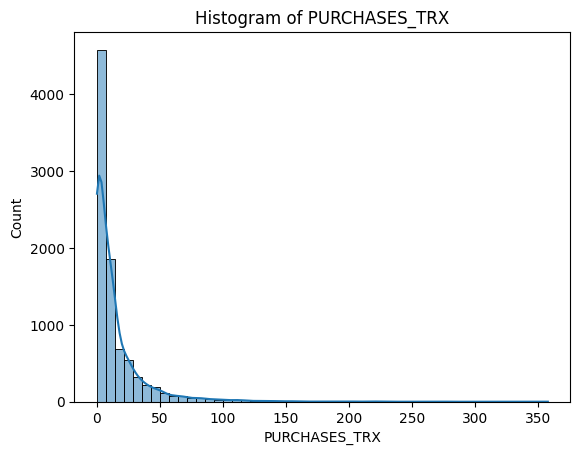

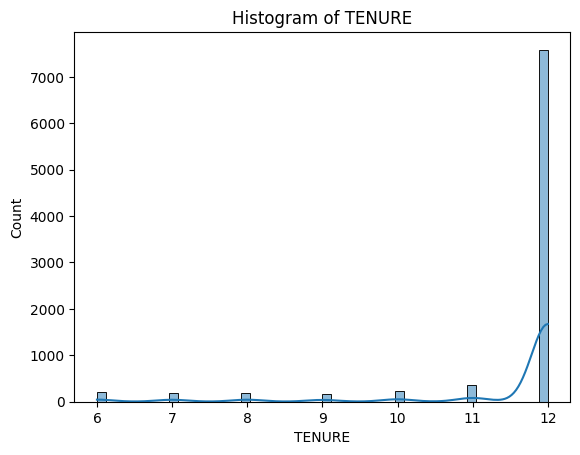

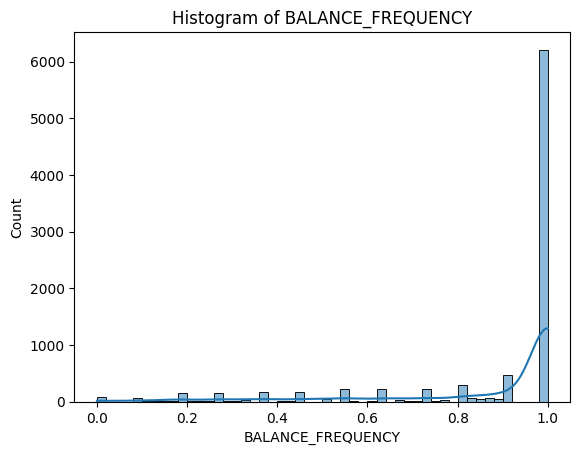

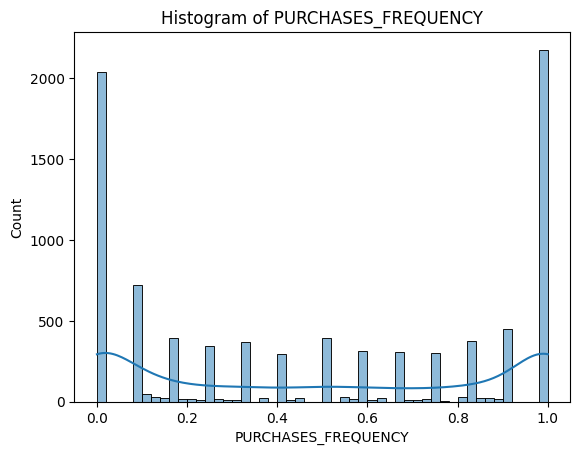

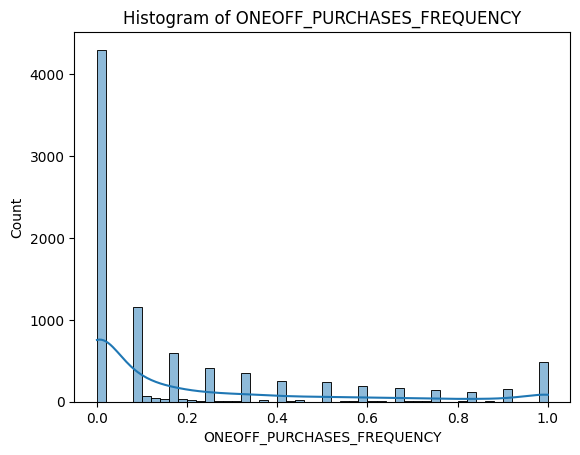

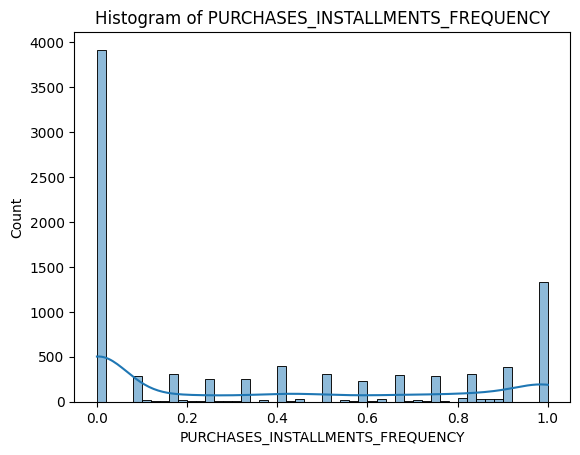

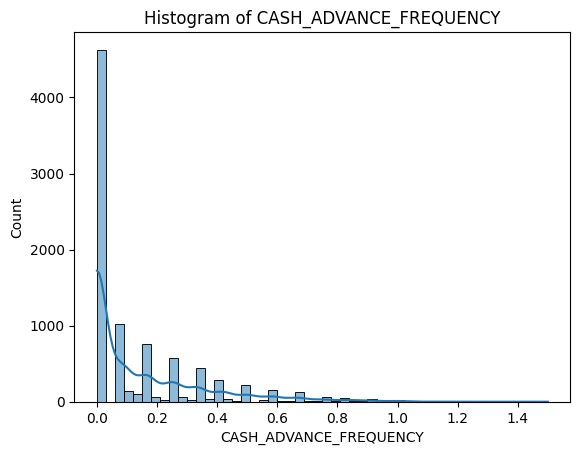

In [14]:
if viewPlots:
    for feature in to_hist_plot:
        sns.histplot(data=unsupervised_df, x=feature, bins=50, kde=True)
        plt.title(f'Histogram of {feature}')
        
        plt.show()

### Impute Data
- Taking some of what looks to be the largest factors of determining MINIMUM_PAYMENTS

In [15]:
#Using KNN imputer
knn_neighbors = ['PAYMENTS', 'BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CREDIT_LIMIT', 'TENURE', 'MINIMUM_PAYMENTS']
knn = KNNImputer()

unsupervised_df[knn_neighbors] = knn.fit_transform(unsupervised_df[knn_neighbors])

unsupervised_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Clustering Data

In [16]:
#grab numeric features to cluster and observe
numeric_features = unsupervised_df.select_dtypes(include=['int64', 'float64']).columns

In [59]:
#Create clustering df copy to Power Transform(Yeo-Johnson) and work with due to a lot of right skewed data
power_transformer = PowerTransformer()

clustering_df = pd.DataFrame(
    power_transformer.fit_transform(unsupervised_df[numeric_features]),
    columns=power_transformer.get_feature_names_out(),
    index=unsupervised_df[numeric_features].index
)
clustering_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.238103,-1.079348,-0.368050,-1.000488,0.383704,-0.944538,-0.766859,-0.903315,-0.606642,-0.883204,-0.905801,-0.573664,-1.425359,-0.983876,-0.779824,-0.677889,0.422252
1,1.051961,-0.424939,-1.505149,-1.000488,-1.085422,1.399909,-1.278866,-0.903315,-1.004445,1.124423,1.044342,-1.387624,0.924204,1.285321,0.909902,1.235021,0.422252
2,0.860616,0.628612,0.521657,1.065381,-1.085422,-0.944538,1.218860,1.732554,-1.004445,-0.883204,-0.905801,0.494757,1.012182,-0.291722,0.483331,-0.677889,0.422252
3,0.570542,-1.710851,0.875823,1.229556,-1.085422,0.680451,-1.015926,-0.092230,-1.004445,0.136071,0.194580,-0.872718,1.012182,-2.782085,0.092167,-0.677889,0.422252
4,0.111925,0.628612,-0.904786,-0.019902,-1.085422,-0.944538,-1.015926,-0.092230,-1.004445,-0.883204,-0.905801,-0.872718,-1.215715,-0.231669,-0.295767,-0.677889,0.422252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.351366,0.628612,0.066579,-1.000488,0.748736,-0.944538,1.218860,-0.903315,1.183098,-0.883204,-0.905801,0.046192,-1.425359,-0.708925,-1.717204,1.731651,-2.526612
8946,-1.465213,0.628612,0.079480,-1.000488,0.758643,-0.944538,1.218860,-0.903315,1.183098,-0.883204,-0.905801,0.046192,-1.425359,-0.807239,-0.807417,-0.677889,-2.526612
8947,-1.409349,-0.991324,-0.216300,-1.000488,0.518629,-0.944538,0.876464,-0.903315,0.943466,-0.883204,-0.905801,-0.066072,-1.425359,-1.437791,-1.245021,1.328455,-2.526612
8948,-1.558537,-0.991324,-1.505149,-1.000488,-1.085422,0.237936,-1.278866,-0.903315,-1.004445,0.745869,0.635829,-1.387624,-2.203291,-1.626657,-1.597440,1.328455,-2.526612


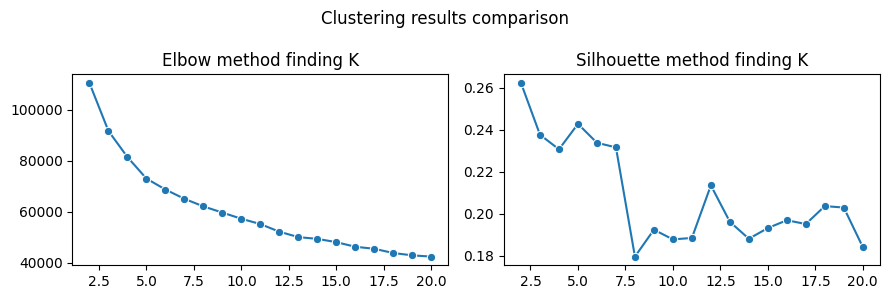

In [60]:
#plot elbow clusters and silhouette scores to find best k
if viewPlots:
    k_range = range(2,21)
    inertias = []
    silhouettes = []
    fig, axes = plt.subplots(1, 2, figsize=(9, 3))

    for k in k_range:
        find_kmean_k = KMeans(n_clusters=k, random_state=320)

        find_kmean_k.fit(clustering_df)
        inertias.append(find_kmean_k.inertia_)

        labels = find_kmean_k.fit_predict(clustering_df)
        silhouettes.append(silhouette_score(clustering_df, labels))

    sns.lineplot(x=k_range, y=inertias, ax=axes[0], marker='o')
    axes[0].set_title('Elbow method finding K')
    sns.lineplot(x=k_range, y=silhouettes, ax=axes[1], marker='o')
    axes[1].set_title('Silhouette method finding K')

    fig.suptitle('Clustering results comparison')
    plt.tight_layout()
    plt.show()

K = 6 seems appropriate on elbow graph but our silhouette score graph shows us that 2 is probably the best. This is suggesting there are no clusters or hinting there is a lot of overlap and weak structure for finding clusters. This is expected with financial data.


In [61]:
#Kmeans cluster
kmeans_cluster = KMeans(random_state=320, n_clusters=2)
kmeans_labels = kmeans_cluster.fit_predict(clustering_df)

kmeans_silhouette = silhouette_score(clustering_df, kmeans_labels)
print(f'Kmeans silhouette: {kmeans_silhouette}')

Kmeans silhouette: 0.2622404567012616


In [62]:
#Hierarchial cluster
hier_cluster = AgglomerativeClustering(n_clusters=2)
hier_labels = hier_cluster.fit_predict(clustering_df)

hier_silhouette = silhouette_score(clustering_df, hier_labels)
print(f'Hierarchial silhouette: {hier_silhouette}')

Hierarchial silhouette: 0.24257438011833746


In [94]:
#DBScan cluster
#Note: eps has a minimum of 23 before it can not find clusters
eps=2.98
dbscan_cluster = DBSCAN(eps=eps)
dbscan_labels = dbscan_cluster.fit_predict(clustering_df)
print(dbscan_labels)

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f'DBSCAN found {n_clusters} clusters and {n_noise} noise points')

mask = dbscan_labels != 1
dbscan_silhouette = silhouette_score(clustering_df, dbscan_labels)

print(f'DBSCAN silhouette: {dbscan_silhouette}')

[0 0 0 ... 0 0 0]
DBSCAN found 1 clusters and 8 noise points
DBSCAN silhouette: 0.2759885154523432


Looking at the silhouettes of various clustering models, KMeans is still the best option due to DBscan's best score resulting in only 1 cluster. So we go with Kmeans and do some dimensionality reduction

#### Dimensionality Reduction 

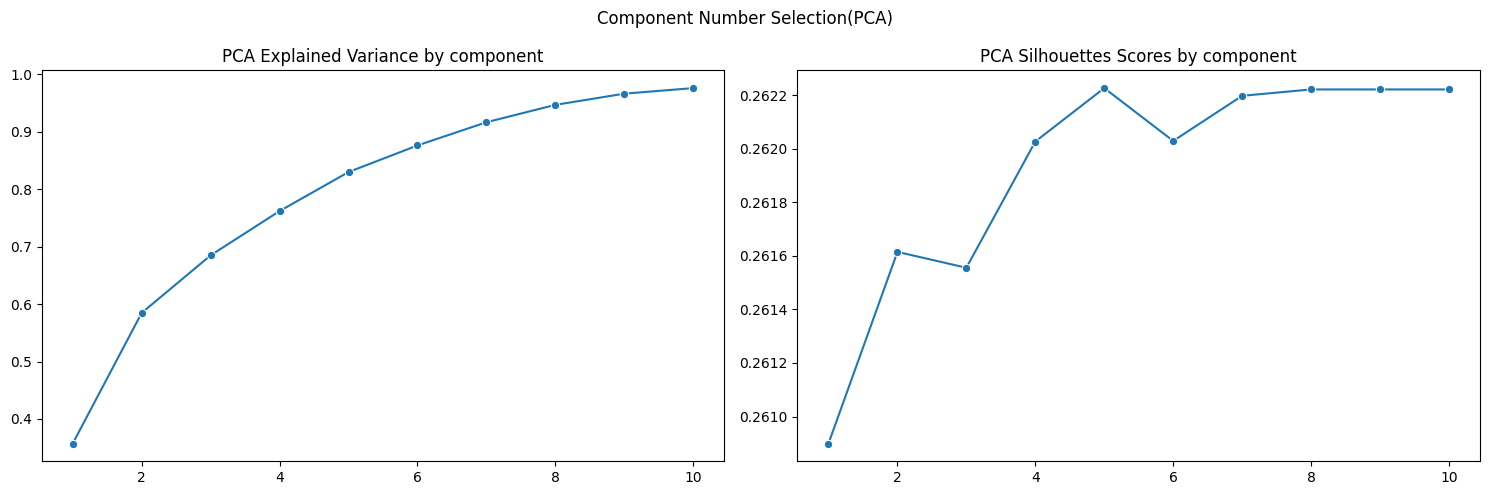

In [96]:
#plot range of components for dimensionality reduction on PCA and TSNE
if viewPlots:
    comp_range = range(1, 11)
    cumulative_variance = []
    silhouettes = []
    
    #PCA
    for n_comp in comp_range:
        kmeans_cluster = KMeans(n_clusters=2, random_state=320)

        pca = PCA(n_components=n_comp, random_state=320)
        pca.fit(clustering_df)
        cumulative_variance.append(np.sum(pca.explained_variance_ratio_))
        
        kmeans_labels = kmeans_cluster.fit_predict(pca.transform(clustering_df))
        silhouettes.append(silhouette_score(clustering_df, kmeans_labels))
    


    #Plotting
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    sns.lineplot(x=comp_range, y=cumulative_variance, ax=axes[0], marker='o')
    axes[0].set_title('PCA Explained Variance by component')
    sns.lineplot(x=comp_range, y=silhouettes, ax=axes[1], marker='o')
    axes[1].set_title('PCA Silhouettes Scores by component')

    plt.suptitle('Component Number Selection(PCA)')
    plt.tight_layout()
    plt.show()


Looks like 5 would have the best score as well as a .9 variance which is pretty good.

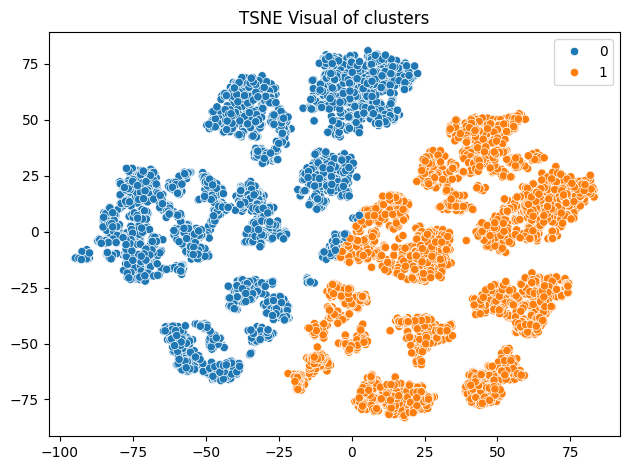

In [97]:
#t-SNE
if viewPlots:
    
    tsne = TSNE(n_components=2, random_state=320)
    X_tsne = tsne.fit_transform(clustering_df)
    kmeans_labels = KMeans(n_clusters=2, random_state=320).fit_predict(X_tsne)

    plt.title('TSNE Visual of clusters')
    sns.scatterplot(
        x=X_tsne[:, 0],
        y=X_tsne[:, 1],
        hue=kmeans_labels,
        palette='tab10'
    )

    plt.tight_layout()
    plt.show()

#### Apply the following:
- K means being k=2 
- PCA being pc=5

In [98]:
#Combine k means clustering we found being k=2 and PCA selection we found being pc=5 to get our best cluster
kmeans_cluster = KMeans(n_clusters=2, random_state=320)
pca = PCA(n_components=5, random_state=320)

best_pca = pca.fit_transform(clustering_df)
print(best_pca.shape)
best_labels = kmeans_cluster.fit_predict(pca.transform(clustering_df))

(8950, 5)


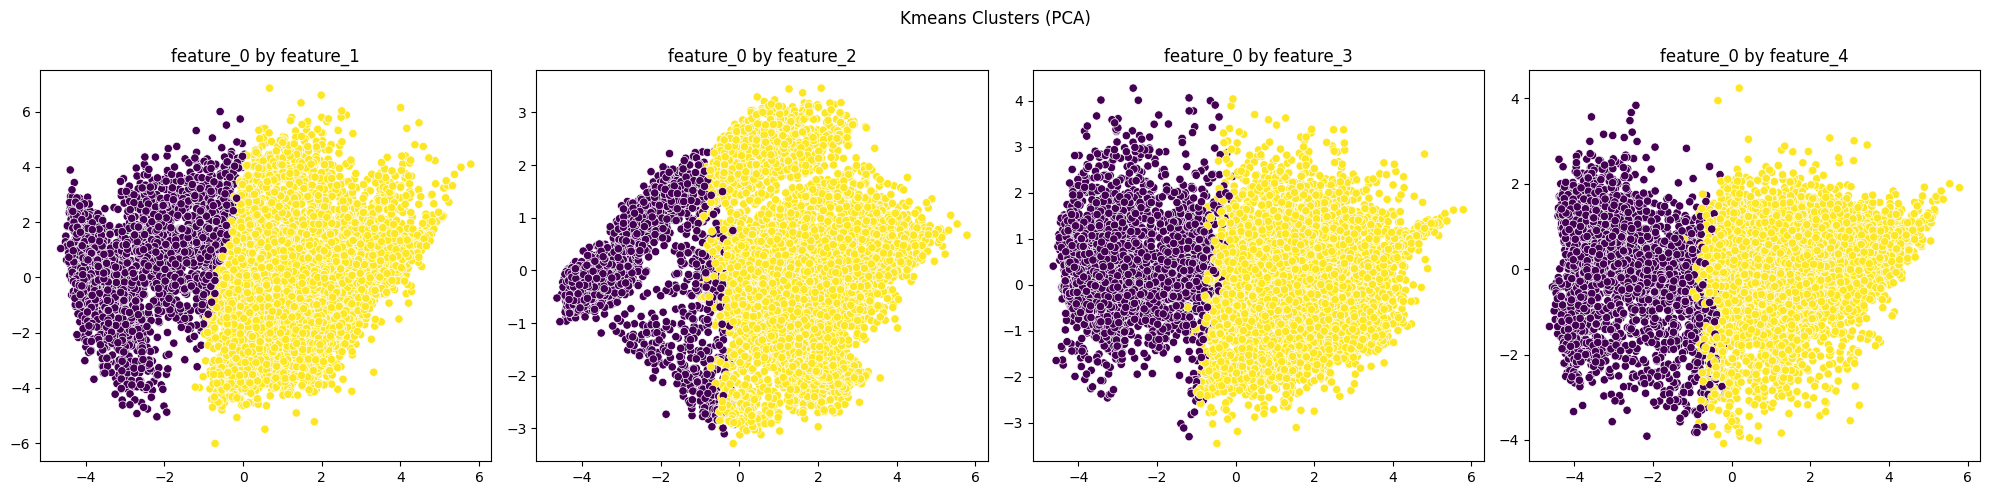

In [99]:
if viewPlots:
    #plot feature 0 against the others, COOL TO SEE
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    for i in range(1, 5):
        sns.scatterplot(x=best_pca[:,0], y=best_pca[:, i], c=best_labels, ax=axes[i-1])
        axes[i-1].set_title(f'feature_0 by feature_{i}')

    plt.suptitle('Kmeans Clusters (PCA)')
    plt.tight_layout()
    plt.show()

### Observe User Profiling Clusters

In [100]:
#Adding back the cluster labels and creating a copy of the data
profiling_df = unsupervised_df.copy(deep=True)
profiling_df['cluster'] = best_labels
profiling_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12.0,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12.0,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12.0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,388.798690,0.000000,12.0,0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6.0,1
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,135.172417,0.000000,6.0,1
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6.0,1
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6.0,0


Discovered a weird case where PURCHASES_TRX is having abysmally low negative transactions from the reverse transform, we can ignore these and count them as zero.

In [27]:
profiling_df['PURCHASES_TRX'] = profiling_df['PURCHASES_TRX'].round(2).abs()
profiling_df['PURCHASES_TRX']

0        2
1        0
2       12
3        1
4        1
        ..
8945     6
8946     6
8947     5
8948     0
8949    23
Name: PURCHASES_TRX, Length: 8950, dtype: int64

In [28]:
#take out features that would be key to profiling types of users
profiling_features = ['BALANCE','PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT', 'CASH_ADVANCE']

#### Create Feature Groups

In [29]:
#Creating PRC_PAYMENT_GROUP feature
profiling_df['PRC_PAYMENT_GROUP'] = pd.cut(
    profiling_df['PRC_FULL_PAYMENT'] * 100,
    bins=[0, 25, 50, 75, 100],
    labels=['0-25%', '26-50%', '51-75%', '76-100%'],
    include_lowest=True
)

profiling_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,PRC_PAYMENT_GROUP
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12.0,1,0-25%
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12.0,0,0-25%
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12.0,1,0-25%
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,388.798690,0.000000,12.0,1,0-25%
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12.0,1,0-25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6.0,1,26-50%
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,135.172417,0.000000,6.0,1,0-25%
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6.0,1,0-25%
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6.0,1,0-25%


In [30]:
profiling_df['CASH_ADVANCE'].describe()

count     8950.000000
mean       978.871112
std       2097.163877
min          0.000000
25%          0.000000
50%          0.000000
75%       1113.821139
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

In [31]:
#Creating CASH_ADV_GROUP feature 
profiling_df['CASH_ADV_GROUP'] = pd.cut(
    profiling_df['CASH_ADVANCE'],
    bins=[0, 200, 700, 1300, 47200],
    labels=['LOW', 'MID-LOW', 'MID-HIGH', 'HIGH'],
    include_lowest=True
)

profiling_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,PRC_PAYMENT_GROUP,CASH_ADV_GROUP
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12.0,1,0-25%,LOW
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12.0,0,0-25%,HIGH
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12.0,1,0-25%,LOW
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,388.798690,0.000000,12.0,1,0-25%,MID-LOW
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12.0,1,0-25%,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,325.594462,48.886365,0.500000,6.0,1,26-50%,LOW
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,275.861322,135.172417,0.000000,6.0,1,0-25%,LOW
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,0,5,1000.0,81.270775,82.418369,0.250000,6.0,1,0-25%,LOW
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,2,0,500.0,52.549959,55.755628,0.250000,6.0,1,0-25%,LOW


In [32]:
profiling_df['PURCHASES'].describe()

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
25%         39.635000
50%        361.280000
75%       1110.130000
max      49039.570000
Name: PURCHASES, dtype: float64

In [33]:
#Creating PURCHASES_GROUP feature
profiling_df['PURCHASES_GROUP'] = pd.cut(
    profiling_df['PURCHASES'],
    bins=[0, 100, 700, 1300, 50000],
    labels=['LOW', 'MID-LOW', 'MID-HIGH', 'HIGH'],
    include_lowest=True
)

profiling_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,PRC_PAYMENT_GROUP,CASH_ADV_GROUP,PURCHASES_GROUP
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12.0,1,0-25%,LOW,LOW
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12.0,0,0-25%,HIGH,LOW
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12.0,1,0-25%,LOW,MID-HIGH
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,388.798690,0.000000,12.0,1,0-25%,MID-LOW,HIGH
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12.0,1,0-25%,LOW,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,6,1000.0,325.594462,48.886365,0.500000,6.0,1,26-50%,LOW,MID-LOW
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,6,1000.0,275.861322,135.172417,0.000000,6.0,1,0-25%,LOW,MID-LOW
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,5,1000.0,81.270775,82.418369,0.250000,6.0,1,0-25%,LOW,MID-LOW
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,0,500.0,52.549959,55.755628,0.250000,6.0,1,0-25%,LOW,LOW


#### Cluster differences

In [34]:
#check the means and medians
profiling_summary = (
    profiling_df
    .groupby('cluster')[profiling_features]
    .agg(['mean', 'median'])
)

profiling_summary

BALANCE                 PURCHASES          CREDIT_LIMIT          \
                mean       median         mean   median         mean  median   
cluster                                                                        
0        3871.495640  3493.108514  2396.280277  1006.72  9885.853482  9000.0   
1         951.009605   600.295854   632.768931   302.45  3060.639828  2500.0   

            PAYMENTS             PURCHASES_TRX        PRC_FULL_PAYMENT         \
                mean      median          mean median             mean median   
cluster                                                                         
0        4342.098684  2496.91628     28.329787   12.0         0.149505    0.0   
1        1039.390658   644.59574     11.088119    6.0         0.154834    0.0   

        CASH_ADVANCE               
                mean       median  
cluster                            
0        2619.360057  1202.253044  
1         542.644915     0.000000

This summary is a HUGE indication of how the features play out per cluster. From here you can see the clear differences in credit usage and purchasing patterns. Cluster 0 is showing tendencies revolving customers indicated in cash advancing and not paying off credit balances as well as low purchase amounts. Cluster 1 shows very active and diverse credit usage as well as paying off balances in full. Credit limits are indifferent between the clusters.

In [35]:
pd.crosstab(
    profiling_df['cluster'],
    profiling_df['PRC_PAYMENT_GROUP'],
    normalize='index'
)

PRC_PAYMENT_GROUP,0-25%,26-50%,51-75%,76-100%
cluster,,,,
0,0.828191,0.042553,0.030851,0.098404
1,0.804243,0.071711,0.040736,0.083310


Viewing this cross-tab, cluster 1 has more diverse and higher chances of fully paying off their credit card in full, while cluster 0 is severely skewed towards not paying off their card. Therefore cluster 1 shows more financial responsibility than cluster 0 who are seen as revolver users. 

In [36]:
pd.crosstab(
    profiling_df['cluster'],
    profiling_df['CASH_ADV_GROUP'],
    normalize='index'
)

CASH_ADV_GROUP,LOW,MID-LOW,MID-HIGH,HIGH
cluster,,,,
0,0.408511,0.049468,0.048936,0.493085
1,0.639038,0.108487,0.094059,0.158416


The Cash advanced group cross-tab reinforces our summary, cluster 0 tends to get more cash advance loans compared to cluster 1. This indicates cluster 0 is prone to higher loan payments and debt unlike the more fiscally responsible cluster 1. 

In [37]:
pd.crosstab(
    profiling_df['cluster'],
    profiling_df['PURCHASES_GROUP'],
    normalize='index'
)

PURCHASES_GROUP,LOW,MID-LOW,MID-HIGH,HIGH
cluster,,,,
0,0.251064,0.186170,0.11117,0.451596
1,0.328006,0.377369,0.13918,0.155446


The purchase group cross-tab indicates cluster 0 tend to not make many purchases and typically lean towards the lower end where they dont use their credit much. From the above cross tab they tend to make cash advance purchases instead. Cluster 1 tend to make more diverse and higher credit usage spending. From earlier information cluster 1 also tends to pay that credit balance off showing trends of financial responsibility. 

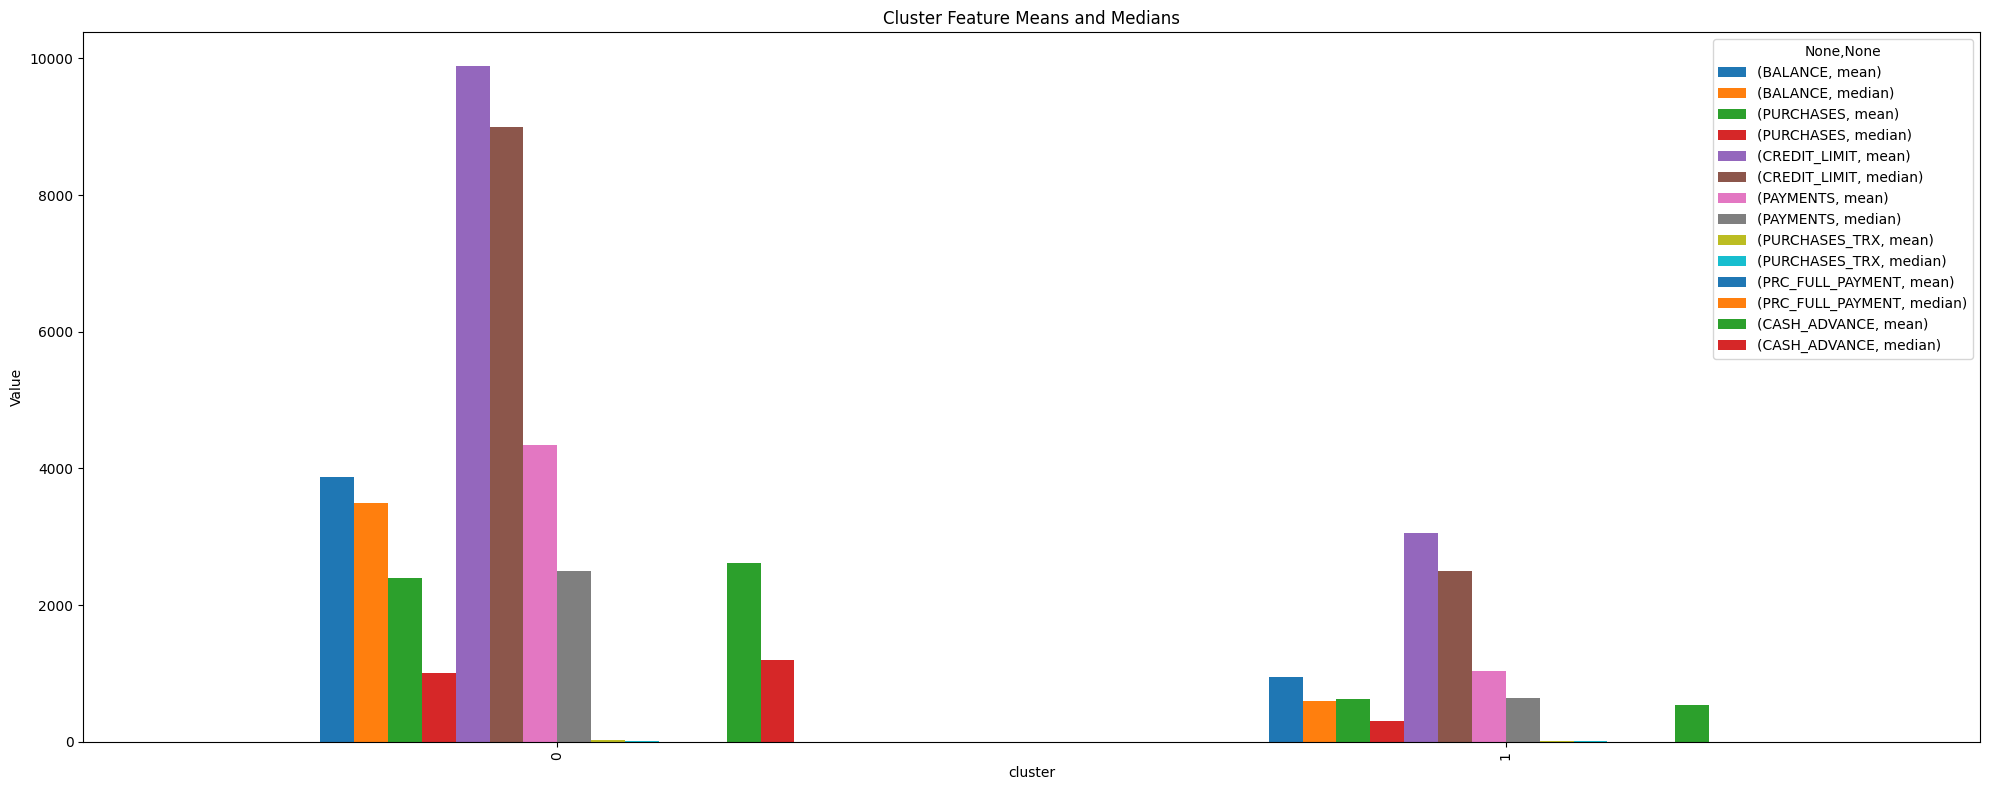

In [38]:
#Cool to see how the summary numbers look next to each other
if viewPlots:
    profiling_summary.plot(kind='bar', figsize=(20,8))
    plt.title('Cluster Feature Means and Medians')
    plt.ylabel('Value')
    plt.tight_layout()
    plt.show()


In [39]:
#Checking how large are these clusters, what is the makeup of revolving users (cluster 0) vs active users (cluster 1)
profile_cluster_sizes = profiling_df['cluster'].value_counts(normalize=True)
profile_cluster_sizes

cluster
1    0.789944
0    0.210056
Name: proportion, dtype: float64

The size of the clusters shows us that majority of users ARE fiscally responsible. Also looking at the graph **credit limit** and **payments** are fairly similar between the clusters. 

## Apply Supervised Learning Tech

I want to target cash advance groups. This would require a **classification** model since we want to find what group should users be labeled as are they high loan users or more responsible and active users. I initially went into this manually preprocessing the training and data due to learning and ignorance. Later was packaged up into pipelines to support deployment.

In [40]:
#Let's get a fresh copy of the scaled data
supervised_df = unsupervised_df.copy(deep=True)
supervised_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12.0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,388.798690,0.000000,12.0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6.0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,135.172417,0.000000,6.0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6.0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6.0


### Create our Target Feature

In [41]:
#Our target is to define if a user is a risky/revolving user or active responsible user this leans towards a binary classification
#Create revolving binary target feature using user behavioral patterns
ca_threshold = supervised_df['CASH_ADVANCE'].quantile(0.5)
prc_threshold = supervised_df['PRC_FULL_PAYMENT'].quantile(0.5)

supervised_df['REVOLVER'] = (
    (supervised_df['CASH_ADVANCE'] >= ca_threshold) &
    (supervised_df['PRC_FULL_PAYMENT'] <= prc_threshold)
).astype(np.bool)


In [42]:
supervised_df[supervised_df['REVOLVER'] == True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,REVOLVER
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12.0,True
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.0,12.0,True
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,388.798690,0.0,12.0,True
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12.0,True
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.0,12.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.0,6.0,True
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.0,6.0,True
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,161.177993,0.0,6.0,True
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,135.172417,0.0,6.0,True


In [43]:
#Create our target variable
Y = supervised_df['REVOLVER']

In [44]:
#Create our features to train against the target
#Remove features that will leak or involved in creating the REVOLVER feature to prevent leakage
X = supervised_df.drop(columns=['REVOLVER','CUST_ID','CASH_ADVANCE', 'PRC_FULL_PAYMENT'])

In [45]:
#Create our Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=320)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of Y_train: {Y_train.shape}')
print(f'Shape of Y_test: {Y_test.shape}')

Shape of X_train: (7160, 15)
Shape of X_test: (1790, 15)
Shape of Y_train: (7160,)
Shape of Y_test: (1790,)


### Feature Scaling
- lots of right-skewed data so we can power transform closer magnitudes 

In [46]:
#Use Power transformer to normalize a lot of right skewed data
power_transformer = PowerTransformer()
X_train_lr = pd.DataFrame(
    power_transformer.fit_transform(X_train),
    columns=power_transformer.get_feature_names_out(),
    index=X_train.index
)
X_test_lr = pd.DataFrame(
    power_transformer.fit_transform(X_test),
    columns=power_transformer.get_feature_names_out(),
    index=X_test.index
)

pd.set_option('display.max_columns', None)
print(X_train_lr.shape)
print(X_test_lr.shape)

(7160, 15)
(1790, 15)


### LogisticRegression Training
- Going with Logistic Regression since we are essentially categorizing between Revolving or non-Revolving users

In [47]:
#Creating and training LogisticRegression model
log_regress = LogisticRegression(random_state=320, max_iter=1000, class_weight='balanced')

lr_scores = cross_validate(
    log_regress,
    X_train_lr,
    Y_train,
    cv=10,
    scoring=['roc_auc', 'f1']
)

lr_auc = lr_scores['test_roc_auc']
lr_f1 = lr_scores['test_f1']


print(f'Logistic Regression - AUC: {lr_auc.mean()} (+/- {lr_auc.std()}), F1: {lr_f1.mean()} (+/- {lr_f1.std()})\n')

log_regress.fit(X_train_lr, Y_train)
lr_pred = log_regress.predict(X_test_lr)
print(classification_report(Y_test, lr_pred))

Logistic Regression - AUC: 0.92002297987534 (+/- 0.01283277722467512), F1: 0.8733766027988631 (+/- 0.016308707429063776)

              precision    recall  f1-score   support

       False       0.73      0.86      0.79       633
        True       0.92      0.83      0.87      1157

    accuracy                           0.84      1790
   macro avg       0.82      0.84      0.83      1790
weighted avg       0.85      0.84      0.84      1790



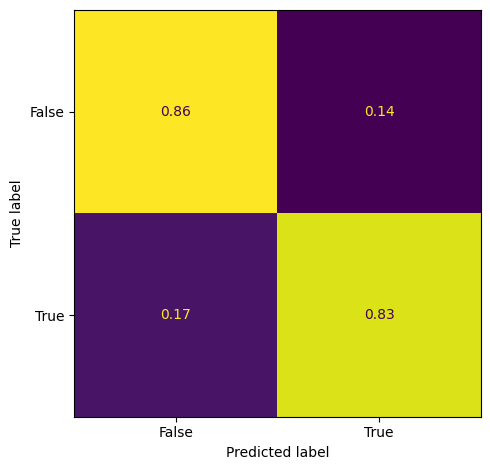

In [48]:
ConfusionMatrixDisplay.from_predictions(
    Y_test,
    lr_pred,
    normalize='true',
    colorbar=False
)

plt.tight_layout()
plt.show()

We now have a good baseline model! Our Logistic Regression model is very good (AUC 92% chance) at determining if you are a revolving or non-revolving user based on spending behaviors! 

In [49]:
#Let's check the feature coefficients
coef_df = pd.DataFrame({
    'feature': X_train_lr.columns,
    'coefficient': log_regress.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)

coef_df

,feature,coefficient
0,BALANCE,3.375597
12,PAYMENTS,-2.372956
9,CASH_ADVANCE_TRX,-1.008177
8,CASH_ADVANCE_FREQUENCY,0.686456
7,PURCHASES_INSTALLMENTS_FREQUENCY,0.653273
5,PURCHASES_FREQUENCY,-0.621736
1,BALANCE_FREQUENCY,-0.600641
4,INSTALLMENTS_PURCHASES,-0.545449
2,PURCHASES,0.505595
13,MINIMUM_PAYMENTS,-0.205953


Looking at our coefficients we can see the order of features that had the biggest impact on our predictions to label a user revolving. 

#### Optimize LR Threshold

In [ ]:
#Find our optimized threshold for classifying users using stratifiedKFold for binary classification
skf = StratifiedKFold(shuffle=True, random_state=320)
thresholds_cv = []

#Using skf split to train the model on train/test data indices returned by it
#This helps avoid using predict which is defaulted to threshold of .5
#We can aggregate the best threshold of every fold to strengthen our reason for optimized threshold
for train_idx, test_idx in skf.split(X_train_lr, Y_train):
    X_tr = X_train_lr.iloc[train_idx]
    X_ts = X_train_lr.iloc[test_idx]
    Y_tr  = Y_train.iloc[train_idx]
    Y_ts = Y_train.iloc[test_idx]

    log_regress = LogisticRegression(random_state=320, max_iter=1000, class_weight='balanced')

    log_regress.fit(X_tr, Y_tr)

    probs = log_regress.predict_proba(X_ts)[:, 1]

    fpr, tpr, thresholds = roc_curve(Y_ts, probs)

    #Use Youden's J statistic for thresholds
    youden_j = tpr - fpr
    best_threshold = thresholds[np.argmax(youden_j)]
    thresholds_cv.append(best_threshold)

mean_best_thresh = np.mean(thresholds_cv)
print(f"Optimal Threshold CV over StratifiedKFold: {mean_best_thresh:.4f}")

Optimal Threshold CV over StratifiedKFold: 0.5576


              precision    recall  f1-score   support

       False       0.71      0.89      0.79       633
        True       0.93      0.80      0.86      1157

    accuracy                           0.83      1790
   macro avg       0.82      0.85      0.83      1790
weighted avg       0.85      0.83      0.84      1790



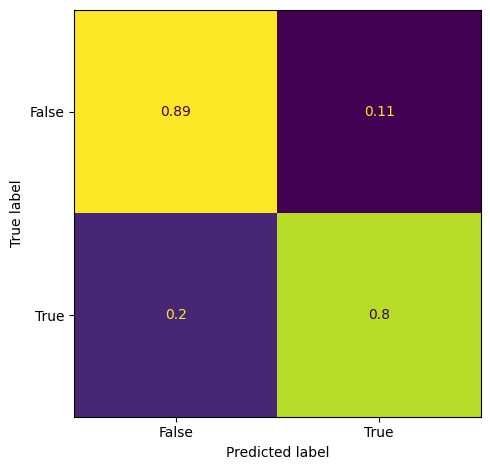

In [51]:
#Apply our optimized threshold to see it in action
log_regress.fit(X_train_lr, Y_train)
proba_test = log_regress.predict_proba(X_test_lr)[:, 1]
log_regress_pred_opt = (proba_test >= mean_best_thresh)

print(classification_report(Y_test, log_regress_pred_opt))

ConfusionMatrixDisplay.from_predictions(
    Y_test,
    log_regress_pred_opt,
    normalize='true',
    colorbar=False
)

plt.tight_layout()
plt.show()

By comparison of our previous threshold, we notice this:
- TN(True Negatives) - went up from .86 to .89
- FN(False Negatives) - went down from .14 to .11
- FP(False Positives) - went up from .17 to .2
- TP(True Positives) - went down from .83 to .8

This shows us our model got better at finding non-Revolving users but incorrectly labels more revolving. The increase to TN is a reasonable risk to the increased FP in this case. Mis-Labeling a user as non-revolving isn't a great risk to the cautionary treatment of the user or the potential funds gained by not being cautious.

### GradientBoostingClassifier
- Applying a GradientBoosterClassifer to help reinforce our LogisticRegressor

In [ ]:
#Apply similar logic as our previous model to train our Gradient booster
#Note: we do not want the scaled X_train data
gradient_boost_classfifier = GradientBoostingClassifier(random_state=320)

gradient_boost_scores = cross_validate(
    gradient_boost_classfifier,
    X_train,
    Y_train,
    cv=10,
    scoring=['roc_auc', 'f1']
)

gradient_auc_score = gradient_boost_scores['test_roc_auc']
gradient_f1_score = gradient_boost_scores['test_f1']

print(f'Gradient Boosting - AUC: {gradient_auc_score.mean()} (+/- {gradient_auc_score.std()}), F1: {gradient_f1_score.mean()} (+/- {gradient_f1_score.std()})\n')

gradient_boost_classfifier.fit(X_train, Y_train)
gradient_pred = gradient_boost_classfifier.predict(X_test)
print(classification_report(Y_test, gradient_pred))

Gradient Boosting - AUC: 0.9409559572982765 (+/- 0.005841577891652198), F1: 0.8982283011559872 (+/- 0.011156843281801795)

              precision    recall  f1-score   support

       False       0.82      0.82      0.82       633
        True       0.90      0.90      0.90      1157

    accuracy                           0.87      1790
   macro avg       0.86      0.86      0.86      1790
weighted avg       0.87      0.87      0.87      1790



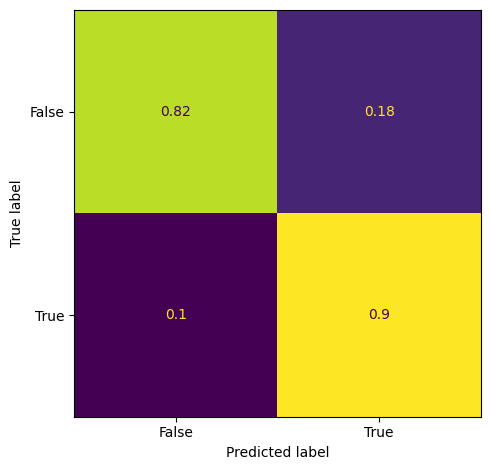

In [53]:
ConfusionMatrixDisplay.from_predictions(
    Y_test,
    gradient_pred,
    normalize='true',
    colorbar=False
)

plt.tight_layout()
plt.show()

We now have a gradient boosting classification model! Our Gradient Boosting Classification model is slightly better (AUC 94% chance) at ranking revolving users over non-revolving users than our previous Logistic Regression model at our default prediction threshold of 0.5. Let's optimize our gradient threshold and see what happens next!

#### Optimize GB Threshold

In [ ]:
#Find our optimized threshold for classifying users using stratifiedKFold for binary classification
skf = StratifiedKFold(shuffle=True, random_state=320)
gb_thresholds_cv = []

#Using skf split to train the model on train/test data indices returned by it
#This helps avoid using predict which is defaulted to threshold of .5
#We can aggregate the best threshold of every fold to strengthen our reason for optimized threshold
for train_idx, test_idx in skf.split(X_train, Y_train):
    X_tr = X_train.iloc[train_idx]
    X_ts = X_train.iloc[test_idx]
    Y_tr  = Y_train.iloc[train_idx]
    Y_ts = Y_train.iloc[test_idx]

    gradient_boost_classfifier = GradientBoostingClassifier(random_state=320)

    gradient_boost_classfifier.fit(X_tr, Y_tr)

    probs = gradient_boost_classfifier.predict_proba(X_ts)[:, 1]

    fpr, tpr, thresholds = roc_curve(Y_ts, probs)

    #Use Youden's J statistic for thresholds
    youden_j = tpr - fpr
    best_threshold = thresholds[np.argmax(youden_j)]
    gb_thresholds_cv.append(best_threshold)

gb_mean_best_thresh = np.mean(gb_thresholds_cv)
print(f"Optimal Threshold CV over StratifiedKFold: {gb_mean_best_thresh:.4f}")

Optimal Threshold CV over StratifiedKFold: 0.6299


              precision    recall  f1-score   support

       False       0.77      0.89      0.83       633
        True       0.94      0.86      0.89      1157

    accuracy                           0.87      1790
   macro avg       0.85      0.87      0.86      1790
weighted avg       0.88      0.87      0.87      1790



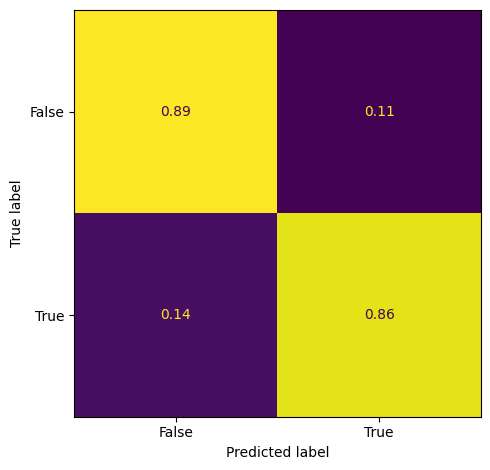

In [55]:
#Apply our optimized threshold to see it in action
gradient_boost_classfifier.fit(X_train, Y_train)
gb_proba_test = gradient_boost_classfifier.predict_proba(X_test)[:, 1]
gradient_boost_pred_opt = (gb_proba_test >= gb_mean_best_thresh)

print(classification_report(Y_test, gradient_boost_pred_opt))

gradient_auc_score = gradient_boost_scores['test_roc_auc']
gradient_f1_score = gradient_boost_scores['test_f1']

ConfusionMatrixDisplay.from_predictions(
    Y_test,
    gradient_boost_pred_opt,
    normalize='true',
    colorbar=False
)

plt.tight_layout()
plt.show()

By comparison of our previous gradient boosting threshold, we notice this:
- TN(True Negatives) - went up from .82 to .89
- FN(False Negatives) - went down from .18 to .11
- FP(False Positives) - went up from .1 to .14
- TP(True Positives) - went down from .9 to .86

This shows us our GB model got better at finding non-Revolving users but incorrectly labels more revolving. The increase to TN is a reasonable risk to the increased FP in this case as well. Another note is ALTHOUGH we lose a few TP Revolving users our precision on predicting True values Neg or Pos has increased, which is arguably better. We overall correctly predict at a higher chance of labeling users revolving or non-revolving.  

## Pipeline Wrap-up

#### Logistic Pipeline

In [56]:
#Create our Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ('knn_imputer', KNNImputer()),
    ('power', PowerTransformer()),
    ('logistic_regressor', LogisticRegression(random_state=320, max_iter=1000, class_weight='balanced'))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=320)

lr_scores = cross_validate(
    lr_pipeline,
    X_train,
    Y_train,
    cv=skf,
    scoring=['roc_auc', 'f1']
)

#Using skf split to train the model on train/test data indices returned by it
#This helps avoid using predict which is defaulted to threshold of .5
#We can aggregate the best threshold of every fold to strengthen our reason for optimized threshold
thresholds_cv = []
for train_idx, test_idx in skf.split(X_train, Y_train):
    X_tr = X_train.iloc[train_idx]
    X_ts = X_train.iloc[test_idx]
    Y_tr  = Y_train.iloc[train_idx]
    Y_ts = Y_train.iloc[test_idx]

    lr_pipeline.fit(X_tr, Y_tr)

    probs = lr_pipeline.predict_proba(X_ts)[:, 1]

    fpr, tpr, thresholds = roc_curve(Y_ts, probs)

    #Use Youden's J statistic for thresholds
    youden_j = tpr - fpr
    best_threshold = thresholds[np.argmax(youden_j)]
    thresholds_cv.append(best_threshold)

mean_best_thresh = np.mean(thresholds_cv)

#default threshold classification
lr_pipeline.fit(X_train, Y_train)
lr_pred = lr_pipeline.predict(X_test)
print('Default Logistic threshold (0.5):')
print(classification_report(Y_test, lr_pred))


#Apply our optimized threshold to see it in action
proba_test = lr_pipeline.predict_proba(X_test)[:, 1]
log_regress_pred_opt = (proba_test >= mean_best_thresh)
print(f'Optimized Logistic threshold (CV):{mean_best_thresh}\n')
print(classification_report(Y_test, log_regress_pred_opt))

Default Logistic threshold (0.5):
              precision    recall  f1-score   support

       False       0.72      0.87      0.79       633
        True       0.92      0.82      0.87      1157

    accuracy                           0.84      1790
   macro avg       0.82      0.84      0.83      1790
weighted avg       0.85      0.84      0.84      1790

Optimized Logistic threshold (CV):0.5422451581082273

              precision    recall  f1-score   support

       False       0.71      0.89      0.79       633
        True       0.93      0.80      0.86      1157

    accuracy                           0.83      1790
   macro avg       0.82      0.85      0.83      1790
weighted avg       0.85      0.83      0.84      1790



#### Gradient Pipeline

In [103]:
#Create our Gradient Boosting Classifier Pipeline
#Note: it doesn't need the scaler
gb_pipeline = Pipeline([
    ('knn_imputer', KNNImputer()),
    ('gradient_classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=320))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=320)

gb_scores = cross_validate(
    gb_pipeline,
    X_train,
    Y_train,
    cv=skf,
    scoring=['roc_auc', 'f1']
)

#Using skf split to train the model on train/test data indices returned by it
#This helps avoid using predict which is defaulted to threshold of .5
#We can aggregate the best threshold of every fold to strengthen our reason for optimized threshold
gb_thresholds_cv = []
for train_idx, test_idx in skf.split(X_train, Y_train):
    X_tr = X_train.iloc[train_idx]
    X_ts = X_train.iloc[test_idx]
    Y_tr  = Y_train.iloc[train_idx]
    Y_ts = Y_train.iloc[test_idx]

    gb_pipeline.fit(X_tr, Y_tr)

    probs = gb_pipeline.predict_proba(X_ts)[:, 1]

    fpr, tpr, thresholds = roc_curve(Y_ts, probs)

    #Use Youden's J statistic for thresholds
    youden_j = tpr - fpr
    best_threshold = thresholds[np.argmax(youden_j)]
    gb_thresholds_cv.append(best_threshold)

gb_mean_best_thresh = np.mean(gb_thresholds_cv)

#default threshold classification
gradient_boost_classfifier.fit(X_train, Y_train)
gradient_pred = gradient_boost_classfifier.predict(X_test)
print('Default Gradient threshold (0.5):')
print(classification_report(Y_test, gradient_pred))

#Apply our optimized threshold to see it in action
gb_proba_test = gb_pipeline.predict_proba(X_test)[:, 1]
gradient_boost_pred_opt = (gb_proba_test >= gb_mean_best_thresh)
print(f'Optimized Gradient threshold (CV):{gb_mean_best_thresh}\n')
print(classification_report(Y_test, gradient_boost_pred_opt))

Default Gradient threshold (0.5):
              precision    recall  f1-score   support

       False       0.82      0.82      0.82       633
        True       0.90      0.90      0.90      1157

    accuracy                           0.87      1790
   macro avg       0.86      0.86      0.86      1790
weighted avg       0.87      0.87      0.87      1790

Optimized Gradient threshold (CV):0.6298651460346257

              precision    recall  f1-score   support

       False       0.77      0.88      0.82       633
        True       0.93      0.86      0.89      1157

    accuracy                           0.86      1790
   macro avg       0.85      0.87      0.86      1790
weighted avg       0.87      0.86      0.87      1790



## Final Conclusion

1. There are odd values that are showing, I recommend consulting with the client or DBA about frequencies, balance being greater than credit limit, very few credit limits being reoccurring decimals, imputing payment data that was originally missing. All these things (even if slightly) changes the outcome of data.
2. Clustering users and discovering a clear difference between a revolving user and non-revolving showed a good behavioral difference between the clusters with how they used their credit cards. Kmeans proved to be the best even after trying others and their silhouette scores. This was probably due to financial data being very obscure and unrelated, super individualism.
3. Lowering the dimensions of the clustered data showed us credit card information aren't big factors in determining a user. Users can be responsible and pay off their cards or take out loans and get cash advances despite similar credit limits and payments. Behavioral patterns of users determines how they are clustered. 
4. I did run into overfitting and data leakage having to fix it. I accidentally introduced features that were factors of our target 'REVOLVING'. The leak was PRC_FULL_PAYMENT that wasn't removed from the training data. This removal made it do the models didn't have any data relating to our target and correctly used the other features to predict. 
5. Classifying with Logistic regression was solid move when we only care about 2 types of users and a great base to start with. Although Gradient Boosting was SLIGHTLY higher with the AUC even when both thresholds were tuned to be better, this just further helped our analysis to separate users. 
6. The Classification Models were scored without bias by creating a cross-validation with Youden's J Statistic to our spread of thresholds from the StratifiedKFold method. We displayed a default classification threshold vs the optimized unbiased threshold. Both models ended up creating more False Positives but this was to the gain of more True Negatives for a better precision and keeping a strong recall.

Overall, the financial credit card spending analysis and payment behaviors is a murky environment that changes constantly, users can reach financial hardships or come into more financial freedom to spend more. The clustering of users is a rocky one but, can be done if you want to track a pattern. 